## Importing Libraries

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from features_selection import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Collection

#### Dataset :

⏱️ 'trip_duration': How long did the journey last?[in Seconds]

🛣️ 'distance_traveled': How far did the taxi travel?[in Km]

🧑‍🤝‍🧑 'num_of_passengers': How many passengers were in the taxi?

💵 'fare': What's the base fare for the journey?[In INR]

💲 'tip': How much did the driver receive in tips?[In INR]

🎀 'miscellaneous_fees': Were there any additional charges during the trip?e.g. tolls, convenience fees, GST, etc.[In INR]

💰 'total_fare': The grand total for the ride (this is your prediction target!).[In INR]

⚡ 'surge_applied': Was there a surge pricing applied? Yes or no?

In [3]:
data = pd.read_csv('taxi_fares_data.csv')

In [4]:
data.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [5]:
data.shape

(209673, 8)

## EDA

In [6]:
data.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [7]:
def meta_data(data):
    total = data.isnull().sum()
    percent = (total/len(data))*100
    datatype = data.dtypes
    unique = data.nunique()
    
    return pd.concat([total,percent,datatype,unique],axis = 1, keys = ['total_missing_values','percent','datatype','unique'])

In [8]:
meta_data(data)

,total_missing_values,percent,datatype,unique
trip_duration,0,0.0,float64,5907
distance_traveled,0,0.0,float64,2463
num_of_passengers,0,0.0,float64,10
fare,0,0.0,float64,631
tip,0,0.0,int64,262
miscellaneous_fees,0,0.0,float64,1674
total_fare,0,0.0,float64,3742
surge_applied,0,0.0,int64,2


#### checking data distribution

As data contains so many training examples, so usally it takes time to render visualization charts. So, sampling data and assuming that sample has the same distribution as the original population

In [9]:
sample = data.sample(frac = 0.1)

In [10]:
sample.shape

(20967, 8)

In [11]:
sample.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
198606,269.0,1.72,1.0,41.25,16,5.6,62.85,0
74361,1856.0,6.89,1.0,150.00,8,5.5,163.50,0
21075,245.0,1.22,1.0,37.50,9,10.2,56.70,0
120731,1282.0,6.79,1.0,135.00,8,13.0,156.00,0
51503,546.0,2.67,1.0,60.00,0,13.5,73.50,0


In [12]:
sns.set()

<Axes: xlabel='num_of_passengers', ylabel='count'>

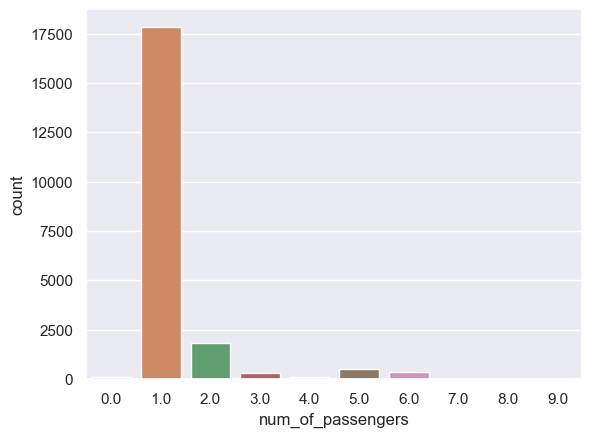

In [13]:
sns.countplot(x = 'num_of_passengers',data = sample)

<Axes: xlabel='surge_applied', ylabel='count'>

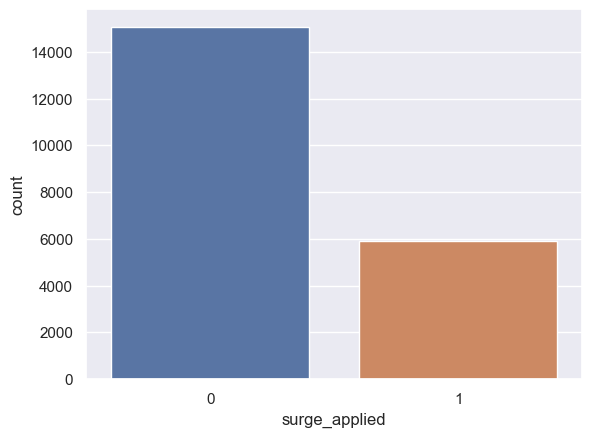

In [14]:
sns.countplot(x = 'surge_applied',data = sample)

Text(0.5, 1.0, 'trip_duration Distribution')

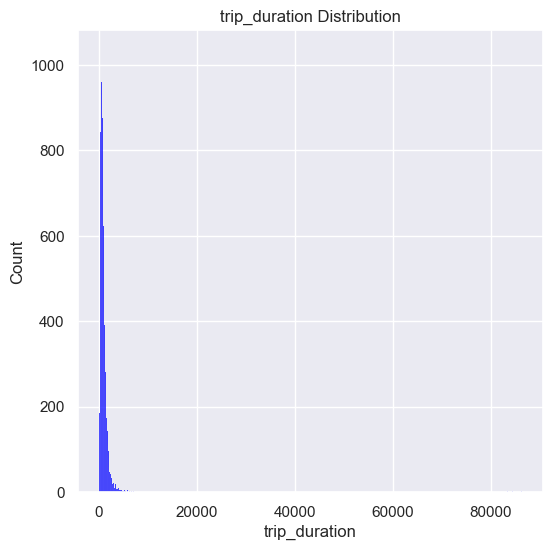

In [15]:
plt.figure(figsize = (6,6))
sns.histplot(sample['trip_duration'],color = 'blue')
plt.title("trip_duration Distribution")

Text(0.5, 1.0, 'distance_traveled Distribution')

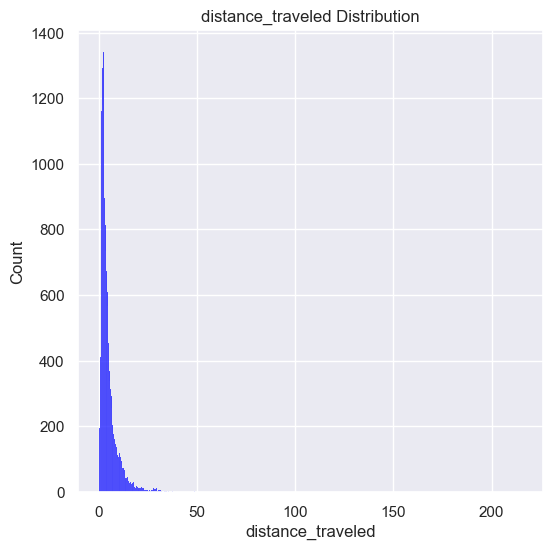

In [16]:
plt.figure(figsize = (6,6))
sns.histplot(sample['distance_traveled'],color = 'blue')
plt.title("distance_traveled Distribution")

Text(0.5, 1.0, 'fare Distribution')

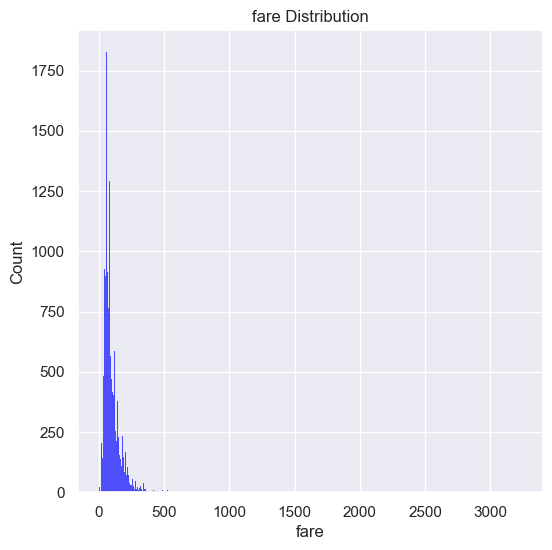

In [17]:
plt.figure(figsize = (6,6))
sns.histplot(sample['fare'],color = 'blue')
plt.title("fare Distribution")

Text(0.5, 1.0, 'tip Distribution')

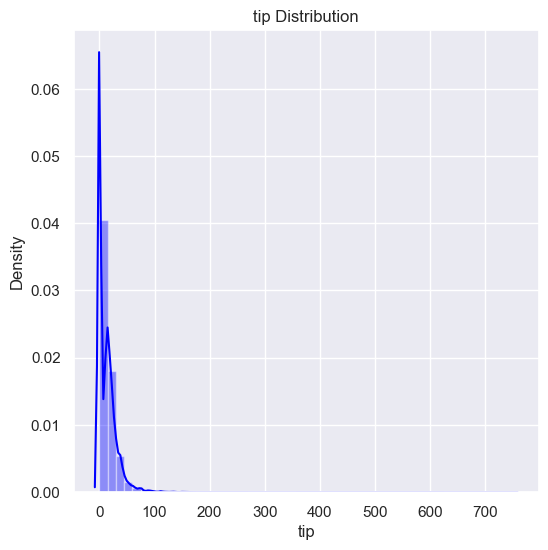

In [18]:
plt.figure(figsize = (6,6))
sns.distplot(sample['tip'],color = 'blue')
plt.title("tip Distribution")

Text(0.5, 1.0, 'miscellaneous_fees Distribution')

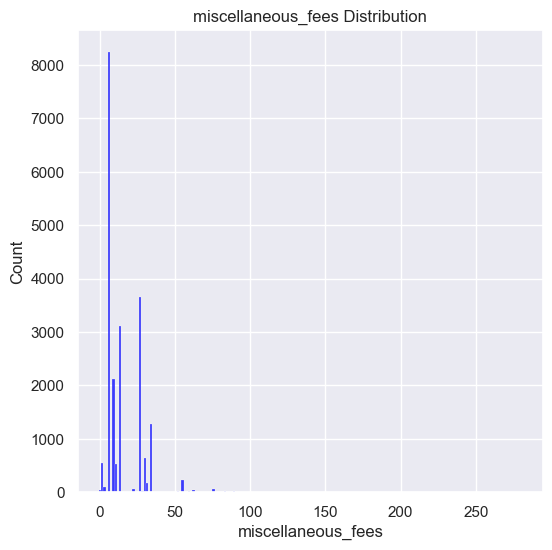

In [19]:
plt.figure(figsize = (6,6))
sns.histplot(sample['miscellaneous_fees'],color = 'blue')
plt.title("miscellaneous_fees Distribution")

Text(0.5, 1.0, 'total_fare Distribution')

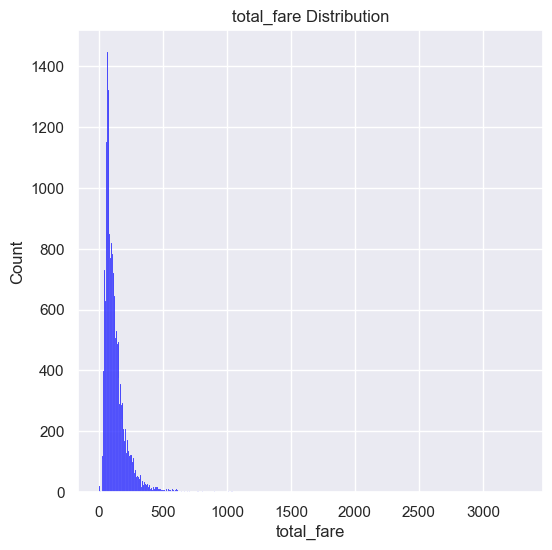

In [20]:
plt.figure(figsize = (6,6))
sns.histplot(sample['total_fare'],color = 'blue')
plt.title("total_fare Distribution")

#### checking outliers

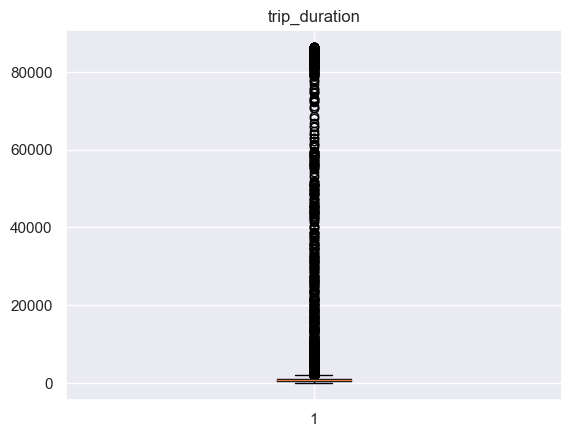

In [21]:
plt.boxplot(data.trip_duration)
plt.title('trip_duration')
plt.show()

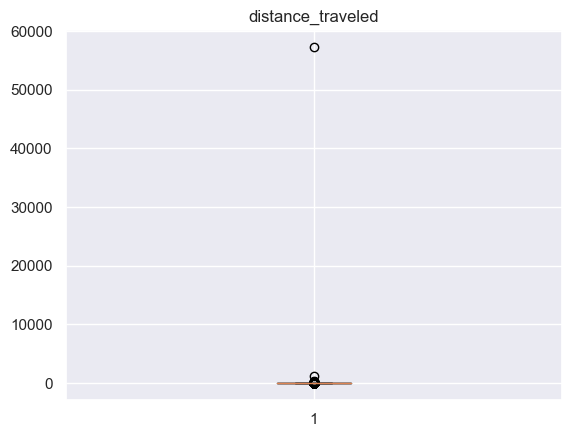

In [22]:
plt.boxplot(data.distance_traveled)
plt.title('distance_traveled')
plt.show()

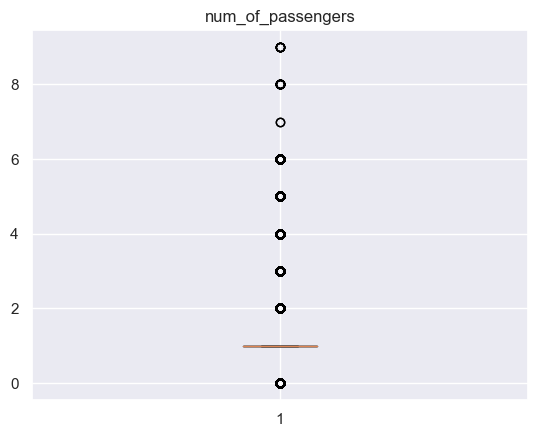

In [23]:
plt.boxplot(data.num_of_passengers)
plt.title('num_of_passengers')
plt.show()

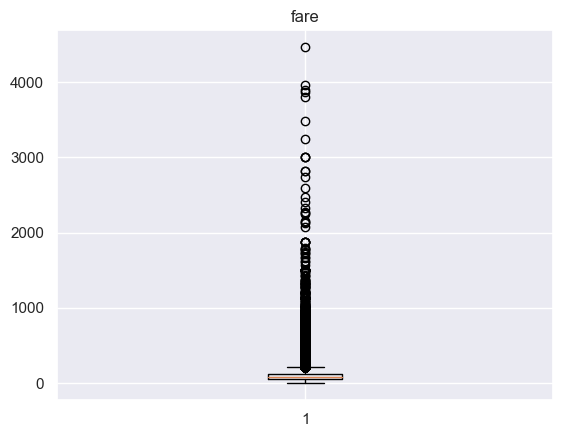

In [24]:
plt.boxplot(data.fare)
plt.title('fare')
plt.show()

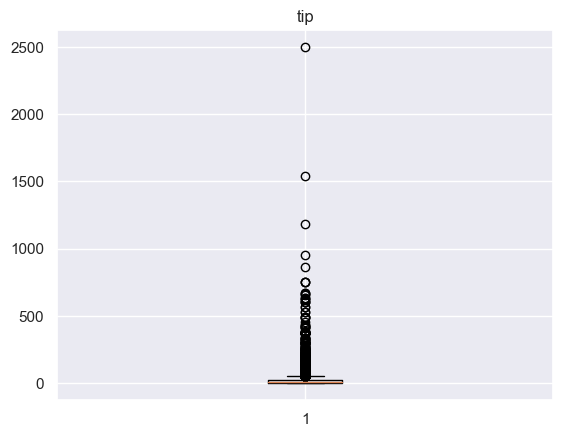

In [25]:
plt.boxplot(data.tip)
plt.title('tip')
plt.show()

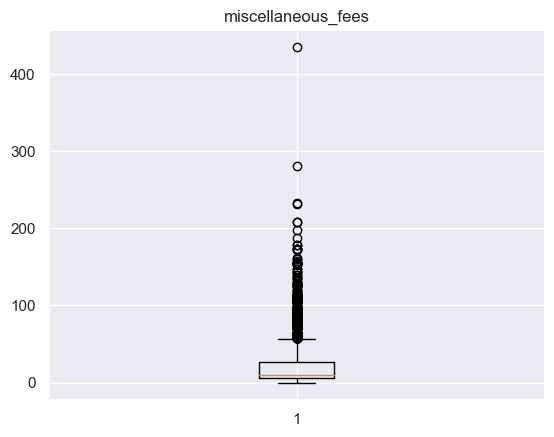

In [26]:
plt.boxplot(data.miscellaneous_fees)
plt.title('miscellaneous_fees')
plt.show()

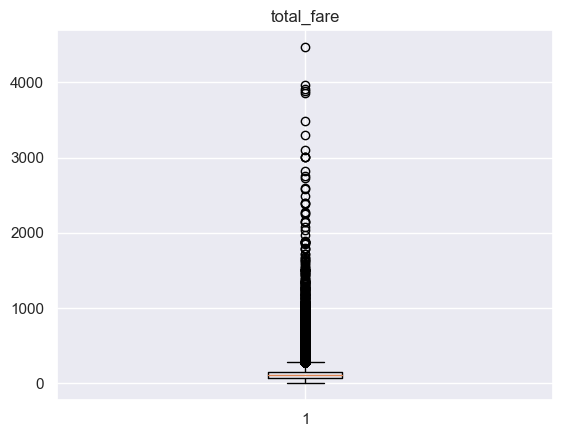

In [27]:
plt.boxplot(data.total_fare)
plt.title('total_fare')
plt.show()

## Data Preprocessing

### outlier removal

In [28]:
def outlier_removal(data):
    print("Available features:", data.columns.tolist())
    print(" ")
    categorical_features = []
    user_input = input("Enter feature names (separated by comma): ").strip()
    print(" ")
    features = [re.sub(r'[^a-zA-Z0-9_]', '', f.strip().lower()) for f in user_input.split(",")]
    filtered_data = data.copy()
    for feature in features:
        if feature not in filtered_data.columns:
            continue
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        if data[feature].nunique() < 50 :
            categorical_features.append(feature)
            continue
        filtered_data = filtered_data[(filtered_data[feature] >= lower_limit) & (filtered_data[feature] <= upper_limit)]
    
    if categorical_features:
        print(f'Categorical Features Spotted :  {categorical_features}')
        print(f'Please handle categorical features manually.')
        print(" ")
    print(f'{data.shape[0]-filtered_data.shape[0]} rows dropped.')
    filtered_data.reset_index(drop = True, inplace = True)
    return filtered_data

In [29]:
filtered_data = outlier_removal(data)

Available features: ['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied']
 
Enter feature names (separated by comma): 'trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'
 
Categorical Features Spotted :  ['num_of_passengers', 'surge_applied']
Please handle categorical features manually.
 
24936 rows dropped.


In [30]:
filtered_data.shape

(184737, 8)

In [31]:
filtered_data.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,184737.000000,184737.000000,184737.000000,184737.000000,184737.000000,184737.000000,184737.000000,184737.000000
mean,717.193161,3.516973,1.288968,78.658626,10.672470,13.862179,103.193274,0.265345
std,400.474341,2.322518,0.934827,35.956470,11.682801,10.020110,45.999791,0.441518
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,419.000000,1.830000,1.000000,52.500000,0.000000,6.000000,67.950000,0.000000
50%,646.000000,2.900000,1.000000,71.250000,8.000000,9.750000,92.700000,0.000000
75%,941.000000,4.620000,1.000000,97.500000,18.000000,26.200000,130.950000,1.000000
max,2076.000000,11.390000,9.000000,210.000000,50.000000,56.500000,274.950000,1.000000


In [32]:
filtered_data = filtered_data[filtered_data["num_of_passengers"] <= 5]

In [33]:
filtered_data.shape

(181639, 8)

### removing irrelevant features

I am excluding 'tip' and 'miscellaneous_fees' from consideration because they do not offer insights into predicting the 'fare' independently. Their values are merely summed up with the 'fare' to derive the 'total_fare'. Hence, I'm also eliminating 'total_fare' since the primary focus is on predicting the 'fare' itself, not its aggregated total including additional charges.

In [34]:
filtered_data.drop(['tip','miscellaneous_fees','total_fare'],axis=1,inplace=True)

In [35]:
filtered_data.shape

(181639, 5)

### features selection

In [36]:
X = filtered_data.drop('fare',axis = 1)
y = filtered_data.fare

In [37]:
X.shape

(181639, 4)

In [38]:
y.shape

(181639,)

In [39]:
fs = Features_Selection(X,y)

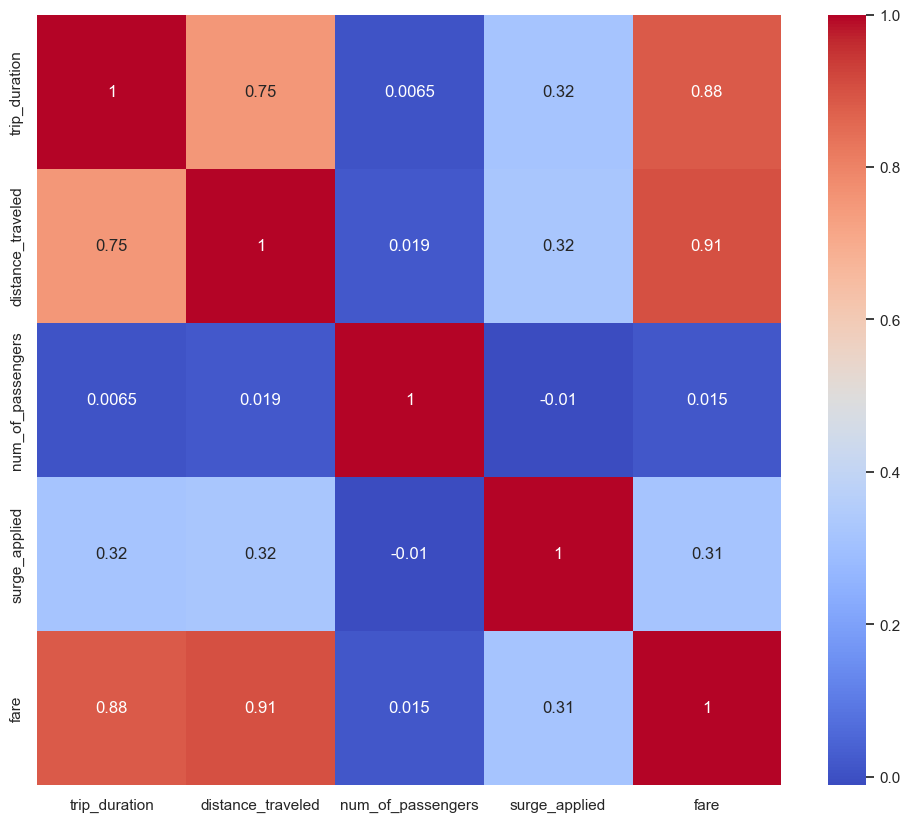

In [40]:
fs.corr_matrix_visual()

In [41]:
fs.const_features_selection(0.001)

Total Variable Features = 4
Total Constant Features = 0

All features have variance of more than 0.001.


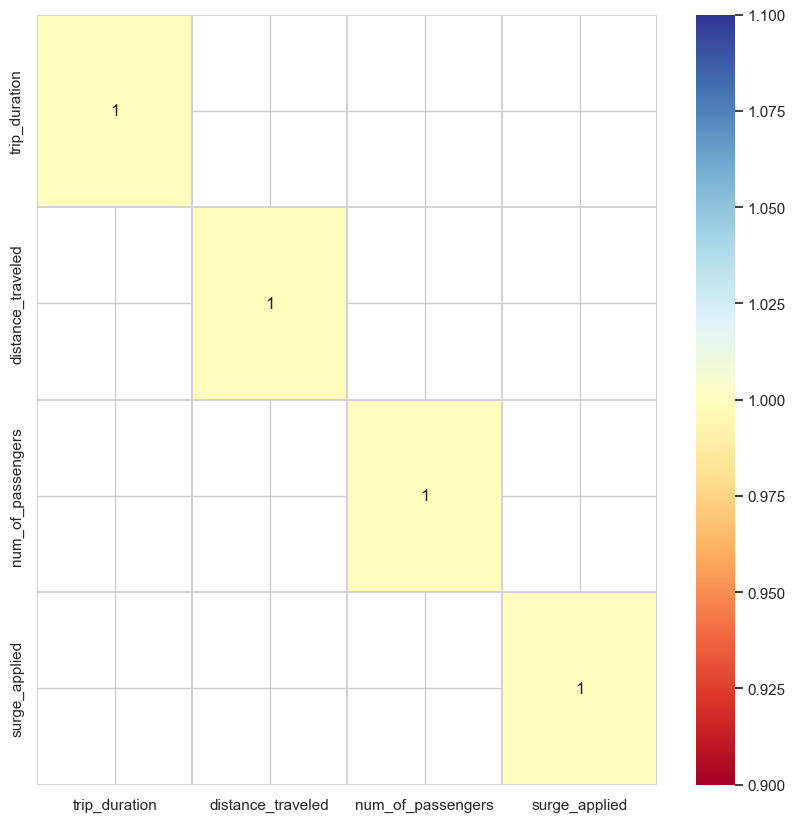

In [42]:
fs.features_corr_visual_filter(0.95)

In [43]:
fs.features_corr_filter(0.95)

All features have correlation of less than 0.95 with each other.


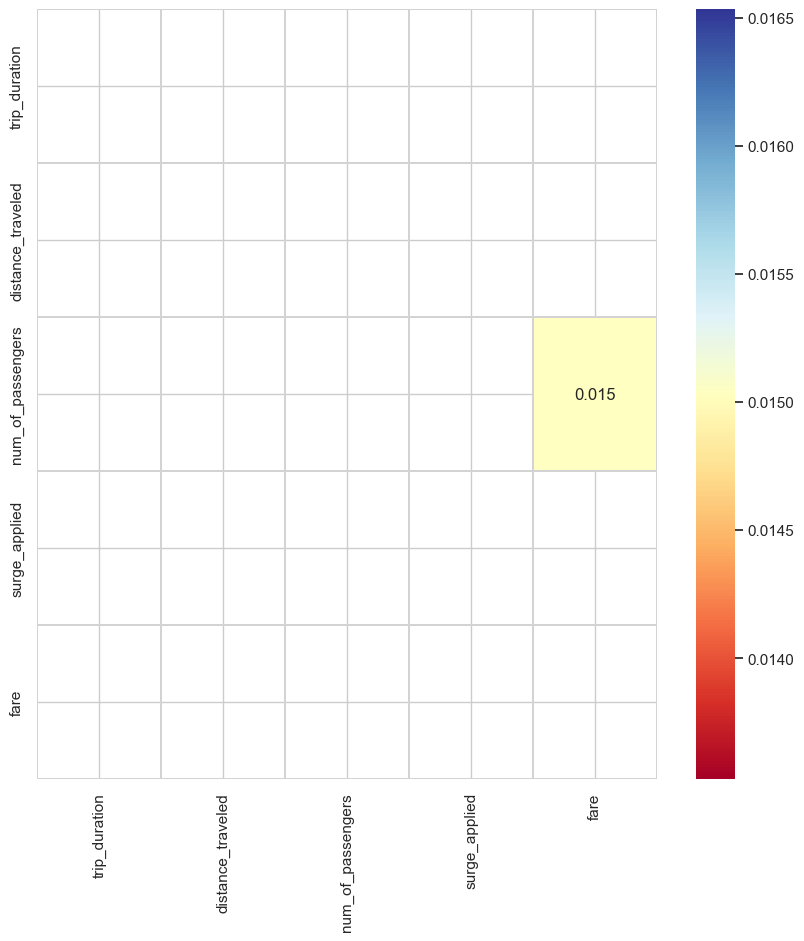

In [44]:
fs.features_corr_with_output_visual_filter(0.05)

In [45]:
fs.features_corr_with_output_filter(0.05)

{'num_of_passengers'}
Do you want to drop the features with correlation with output below threshold 0.05 ? (y/n) y
Features Dropped!


In [46]:
X.shape

(181639, 3)

In [47]:
X.columns

Index(['trip_duration', 'distance_traveled', 'surge_applied'], dtype='object')

### trip_duration unit conversion (from second to minutes) 

In [48]:
X.head()

,trip_duration,distance_traveled,surge_applied
0,748.0,2.75,0
1,1187.0,3.43,0
2,730.0,3.12,1
3,671.0,5.63,0
4,329.0,2.09,0


In [49]:
X['trip_duration'] = X['trip_duration']/60

In [50]:
X.head()

,trip_duration,distance_traveled,surge_applied
0,12.466667,2.75,0
1,19.783333,3.43,0
2,12.166667,3.12,1
3,11.183333,5.63,0
4,5.483333,2.09,0


### nomalization

In [54]:
scaler = MinMaxScaler()

In [55]:
scaler.fit(X)

MinMaxScaler()

In [56]:
scaled_data = scaler.transform(X)

In [57]:
scaled_data[0]

array([0.36030829, 0.24010554, 0.        ])

### exporting scaler model

In [58]:
with open('min_max_scaler_model.p', 'wb') as f:
    pickle.dump(scaler, f)

## Train_Test_Splits

In [59]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data, y, test_size = 0.025)

In [60]:
x_train.shape

(177098, 3)

In [61]:
y_train.shape

(177098,)

In [62]:
x_test.shape

(4541, 3)

In [63]:
y_test.shape

(4541,)

## Models Training with GridSearchCV

In [64]:
import pickle
import pandas as pd
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'xgboost_regression': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [3, 5, 7],
                'learning_rate': [0.01, 0.1, 0.2]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gscv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
        best_estimator = gscv.best_estimator_
        pickle.dump(best_estimator, open(f'{algo_name}_model.p', 'wb'))

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [65]:
stats = gridsearchcv(x_train,y_train)

In [66]:
stats.to_csv('stats.csv')

In [67]:
stats

,model,best_score,best_params
0,linear_regression,0.913215,{}
1,xgboost_regression,0.934379,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


## Models Evaluation

### Linear Regression Model Evaluation

In [68]:
with open('linear_regression_model.p', 'rb') as file:
    model1 = pickle.load(file)

In [69]:
model1.score(x_train,y_train)

0.9135715270708551

In [70]:
model1.score(x_test,y_test)

0.8969988924304847

#### Assumptions for analyzing model performance

1) The scatter plot comparing the true values (y-true) with the predicted values (y-predict) should exhibit a linear relationship

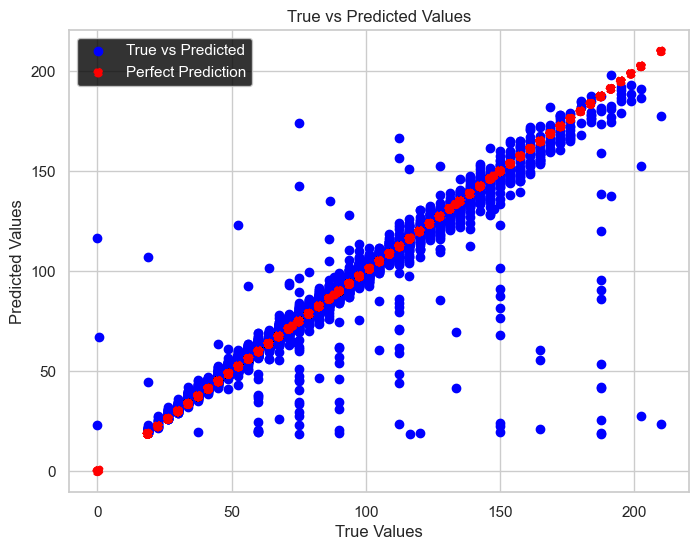

In [71]:
y_true = list(y_test)
y_predict = list(model1.predict(x_test))
plt.figure(figsize=(8, 6),facecolor='white')
plt.scatter(y_true, y_predict, color='blue', label='True vs Predicted')
plt.scatter(y_true, y_true, color='red', linestyle='--', label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.gca().set_facecolor('white')
legend = plt.legend()
plt.setp(legend.get_texts(), color='white')
plt.grid(True)
plt.show()

2) The residuals should follow a normal distribution with a mean approximately equal to zero.

Text(0.5, 1.0, 'Residuals Distribution')

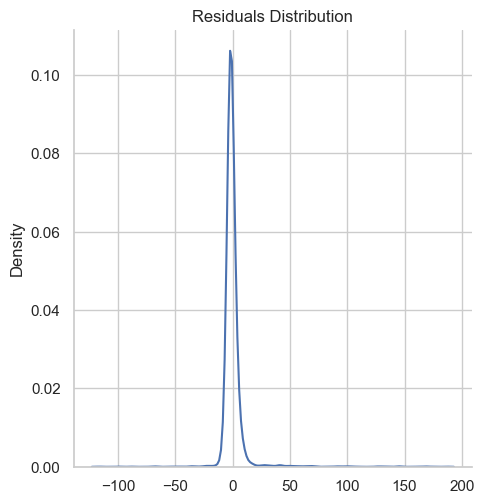

In [72]:
residuals = np.array(y_true)-np.array(y_predict)
sns.set_style("whitegrid") 
sns.displot(residuals,kind='kde')
plt.title('Residuals Distribution')

3) There should be uniform distributions observed between the scatter plot of predictions and residuals.

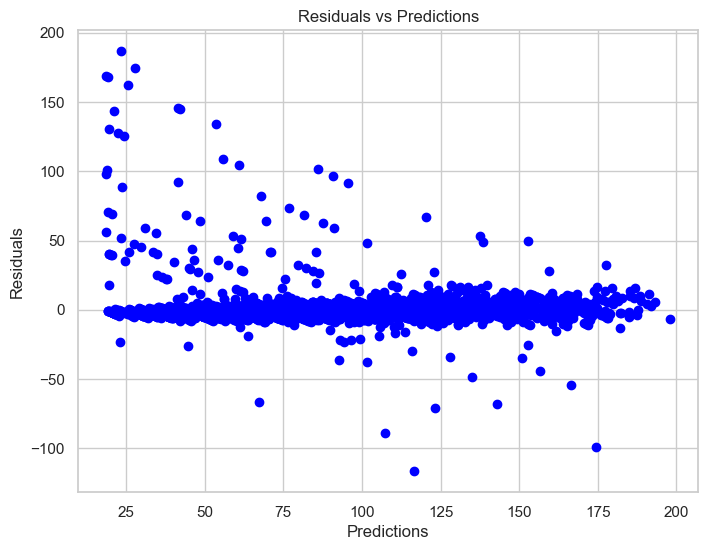

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuals, color='blue', label='True vs Predicted')
plt.title('Residuals vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [75]:
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(y_true,y_predict)}")
print(f"Mean Squared Error (MSE) : {mean_squared_error(y_true,y_predict)}")
print(f"Root Mean Squared Error (RMSE) : {np.sqrt(mean_squared_error(y_true,y_predict))}")
print(f"R Squared : {r2_score(y_true,y_predict)}")

Mean Absolute Error (MAE) : 4.1784707865884885
Mean Squared Error (MSE) : 135.49291400853156
Root Mean Squared Error (RMSE) : 11.640142353447898
R Squared : 0.8969988924304847


### XGBoost Regression Model Evaluation

In [76]:
with open('xgboost_regression_model.p', 'rb') as file:
    model2 = pickle.load(file)

In [77]:
model2.score(x_train,y_train)

0.940676130540132

In [78]:
model2.score(x_test,y_test)

0.9110804662517296

#### Assumptions for analyzing model performance

1) The scatter plot comparing the true values (y-true) with the predicted values (y-predict) should exhibit a linear relationship

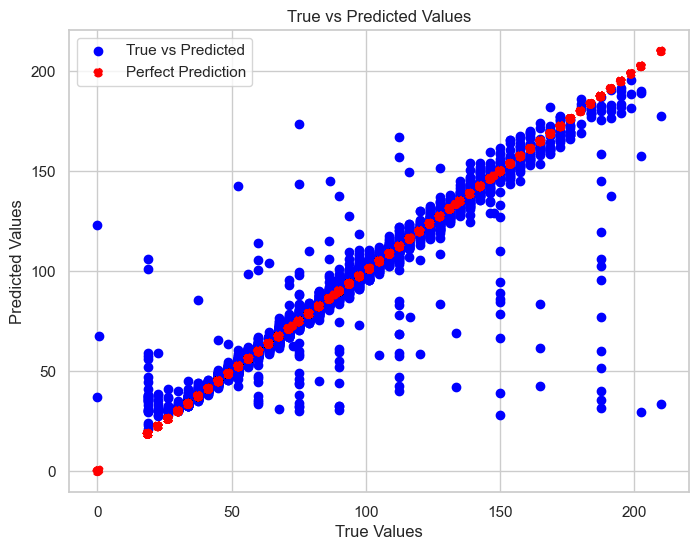

In [83]:
y_true = list(y_test)
y_predict = list(model2.predict(x_test))
plt.figure(figsize=(8, 6),facecolor='white')
plt.scatter(y_true, y_predict, color='blue', label='True vs Predicted')
plt.scatter(y_true, y_true, color='red', linestyle='--', label='Perfect Prediction')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.gca().set_facecolor('white')
legend = plt.legend()
plt.grid(True)
plt.show()

2) The residuals should follow a normal distribution with a mean approximately equal to zero.

Text(0.5, 1.0, 'Residuals Distribution')

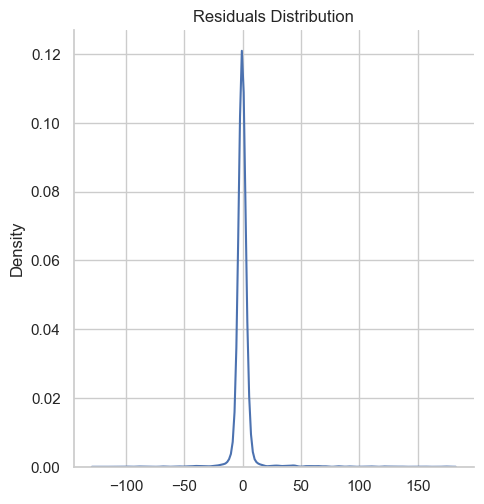

In [84]:
residuals = np.array(y_true)-np.array(y_predict)
sns.set_style("whitegrid") 
sns.displot(residuals,kind='kde')
plt.title('Residuals Distribution')

3) There should be uniform distributions observed between the scatter plot of predictions and residuals.

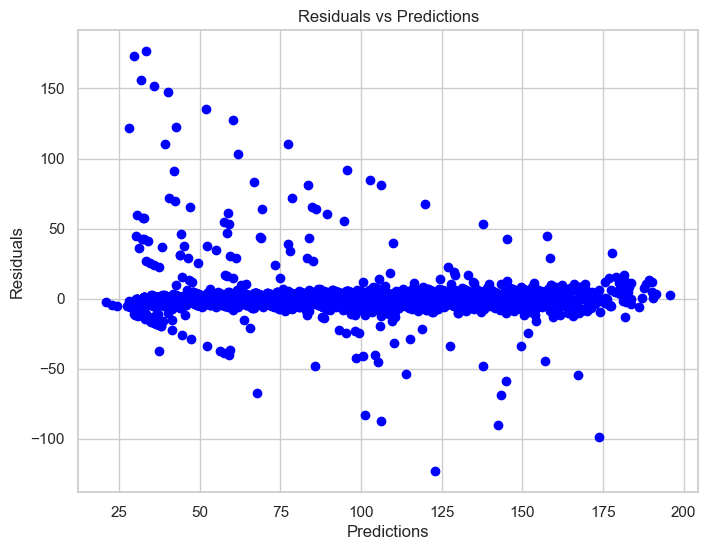

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, residuals, color='blue', label='True vs Predicted')
plt.title('Residuals vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [86]:
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(y_true,y_predict)}")
print(f"Mean Squared Error (MSE) : {mean_squared_error(y_true,y_predict)}")
print(f"Root Mean Squared Error (RMSE) : {np.sqrt(mean_squared_error(y_true,y_predict))}")
print(f"R Squared : {r2_score(y_true,y_predict)}")

Mean Absolute Error (MAE) : 3.5910314054642445
Mean Squared Error (MSE) : 116.96929308941631
Root Mean Squared Error (RMSE) : 10.815234305802917
R Squared : 0.9110804662517296
